<a href="https://colab.research.google.com/github/saleh1312/DeepFake/blob/main/prepare_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import os 
import dlib
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the detector
detector = dlib.get_frontal_face_detector()
# Load the predictor
predictor = dlib.shape_predictor("/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat")

In [ ]:
def mask_p(img,mask):
  img= img.astype(np.float32)
  final = cv2.bitwise_and(img,img,mask=mask)
  final = cv2.resize(final,(128,128))
  mask = cv2.resize(mask,(128,128))
  final=(final.astype(np.float32))

  for x in range(mask.shape[1]):
    for y in range(mask.shape[0]):
      if mask[y,x] != 255:
        final[y,x]=(-1,-1,-1)

  return final


In [ ]:
def img_to_mask(img):
  gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)
  faces = detector(gray)
  if len(faces) ==0:
    return faces
  p=None
  for face in faces:
    x1 = face.left() # left point
    y1 = face.top() # top point
    x2 = face.right() # right point
    y2 = face.bottom() # bottom point

    # Create landmark object
    landmarks = predictor(image=gray, box=face)

    # Loop through all the points
    points=[]
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        points.append((x,y))

    p=np.float32(points)
    break

  hull=cv2.convexHull(p,False)

  hullee=np.reshape(hull,(hull.shape[1],hull.shape[0],hull.shape[2]))

  mask=np.zeros((img.shape[0],img.shape[1]),np.uint8)
  cv2.fillPoly(mask,hullee.astype(np.int32),255)
  cnt, hierarchy = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
  x,y,w,h = cv2.boundingRect(cnt[0])
  facee=img[y:y+h,x:x+w]
  maskee=mask[y:y+h,x:x+w]

  n=mask_p(facee,maskee)

  return n


In [ ]:
x=np.zeros((1000,128,128,3),dtype=np.float32)

In [ ]:
cap = cv2.VideoCapture('/content/drive/MyDrive/deepfake project/videos/da7.wmv')

p=0
while True:
  if p==1000:
    break
  ret,frame= cap.read()
  
  if ret:
    mask=img_to_mask(frame) 
    if len(mask)==0:
      pass
    else:
      x[p]=mask
      p=p+1
  else:
    break




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


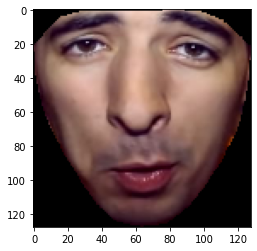

In [ ]:
op= cv2.cvtColor(x[0],cv2.COLOR_BGR2RGB)
plt.imshow(op/255.0)

In [ ]:
np.save('/content/drive/MyDrive/da7ee7.npy',x)